In [1]:
# Método para resolver las energías y eigenfunciones de un sistema cuántico numéricamente
# Modelado Molecular 2
# By: José Manuel Casillas Martín
import numpy as np
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')
import matplotlib.pyplot as plt

In [2]:
# Variables utilizadas
var('x l m hbar w')

(x, l, m, h̅, w)

In [3]:
n = int(input('Introduce el número de funciones que vas a utilizar para resolver el problema: '))
# Lista para ingresar las funciones
f=[]
# Matriz con integral de solapamiento
Sm=[]
# Matriz con integral de intercambio
Hm=[]
# Aproximación de las energías
for i in range(n):
    f.append((input('Introduce la función %d: ' %(i+1))))
f=sympify(f)

# Para partícula en un pozo de potencial de 0 a l
# El siguiente ciclo for resuelve las integrales para formar las matrices Sij (Integrales de solapamiento)
# y Hij(integrale de intercambio)
for i in range(n):
    for j in range(n):
        integrando1=(-hbar**2)/(2*m)*(f[i])*diff(f[j],x,2)
        integrando2=(f[i])*f[j]
        c=Integral(integrando1,(x,0,l))
        c=c.doit()
        Hm.append(c)
        d=Integral(integrando2,(x,0,l))
        d=d.doit()
        Sm.append(d)
Sm=np.reshape(Sm,(n,n))
Hm=np.reshape(Hm,(n,n))

# Matriz M: (Hij-Sij)*w
M=(Hm-Sm*w)
H=sympify(Matrix(M))
Hdet=H.det()
# Resolver el determinante para encontrar las energías
E=solve(Hdet,w)

# Ordenar energías
Eord=solve(Hdet,w)
mass=input('¿Cuánto es la masa de tu partícula? ')
large=input('¿Cuánto es el largo del pozo? ')
energies=np.zeros(n)

for i in range (n):
    energies[i]=E[i].subs({m: mass, l: large, hbar:1.0545718e-34})
energies_ord=sorted(energies)
for i in range(n):
    for j in range(n):
        if energies[i]==energies_ord[j]:
            Eord[i]=E[j]

# Matriz de constantes para todas las eigenfunciones
c=zeros(n)
for i in range(n):
    for j in range(n):
        c[i,j]=Symbol('c %d %d' %(i+1,j+1))
        
# Solución a esas constantes
sol=[]
for i in range (n):
    a=np.reshape(c[0+n*i:(n)+n*i],(n))
    SE=Matrix(np.dot(M,a.transpose()))
    SE=sympify((SE.subs({w:Eord[i]})))
    sol.append(solve(SE,c[0+n*i:(n+1)+n*i]))

if n!= 1:
    csol=zeros(n)
    CTS,cts,Cdet=[],[],[]
    for i in range (n):
        for j in range(n):
            csol[i,j]=(sol[i]).get(c[i,j])
            if csol[i,j] is None:
                csol[i,j]=c[i,j]
                CTS.append(c[i,j]); cts.append(c[i,j]); Cdet.append(c[i,j])
# Hasta aqui se tienen resueltos los problemas de encontrar la constanstes para todas las eigenfunciones
# El programa esta automatizado para n funciones definidas de 0 a l con el potencial de la partícula libre
# Falta asignar esas constantes a cada eigenfuncion y normalizar para encontrar la constante faltante

Introduce el número de funciones que vas a utilizar para resolver el problema: 4
Introduce la función 1: x*(l-x)
Introduce la función 2: x**2*(l-x)**2
Introduce la función 3: x*(l-x)*(1/2*l-x)
Introduce la función 4: x**2*(l-x)**2*(1/2*l-x)
¿Cuánto es la masa de tu partícula? 9.31e-31
¿Cuánto es el largo del pozo? 10e-10


In [5]:
f

⎡            2        2    ⎛l    ⎞           2 ⎛l    ⎞        2⎤
⎢x⋅(l - x), x ⋅(l - x) , x⋅⎜─ - x⎟⋅(l - x), x ⋅⎜─ - x⎟⋅(l - x) ⎥
⎣                          ⎝2    ⎠             ⎝2    ⎠         ⎦

In [6]:
sympify(Matrix(Hm))

⎡  2  3    2  5                ⎤
⎢h̅ ⋅l   h̅ ⋅l                 ⎥
⎢──────  ──────    0       0   ⎥
⎢ 6⋅m     30⋅m                 ⎥
⎢                              ⎥
⎢  2  5    2  7                ⎥
⎢h̅ ⋅l   h̅ ⋅l                 ⎥
⎢──────  ──────    0       0   ⎥
⎢ 30⋅m   105⋅m                 ⎥
⎢                              ⎥
⎢                  2  5    2  7⎥
⎢                h̅ ⋅l   h̅ ⋅l ⎥
⎢  0       0     ──────  ──────⎥
⎢                 40⋅m   280⋅m ⎥
⎢                              ⎥
⎢                  2  7    2  9⎥
⎢                h̅ ⋅l   h̅ ⋅l ⎥
⎢  0       0     ──────  ──────⎥
⎣                280⋅m   1260⋅m⎦

In [7]:
sympify(Matrix(Sm))

⎡ 5     7             ⎤
⎢l     l              ⎥
⎢──   ───   0      0  ⎥
⎢30   140             ⎥
⎢                     ⎥
⎢  7    9             ⎥
⎢ l    l              ⎥
⎢───  ───   0      0  ⎥
⎢140  630             ⎥
⎢                     ⎥
⎢            7     9  ⎥
⎢           l     l   ⎥
⎢ 0    0   ───   ──── ⎥
⎢          840   5040 ⎥
⎢                     ⎥
⎢            9     11 ⎥
⎢           l     l   ⎥
⎢ 0    0   ────  ─────⎥
⎣          5040  27720⎦

In [8]:
Eord

⎡    2                   2                   2                  2            ⎤
⎢2⋅h̅ ⋅(-√133 + 14)  2⋅h̅ ⋅(-9⋅√5 + 30)  2⋅h̅ ⋅(√133 + 14)  2⋅h̅ ⋅(9⋅√5 + 30)⎥
⎢──────────────────, ──────────────────, ─────────────────, ─────────────────⎥
⎢        2                   2                   2                  2        ⎥
⎣       l ⋅m                l ⋅m                l ⋅m               l ⋅m      ⎦

In [9]:
csol

⎡        2               2                                         ⎤
⎢ c 1 2⋅l    √133⋅c 1 2⋅l                                          ⎥
⎢ ──────── + ─────────────   c 1 2             0                0  ⎥
⎢    3             21                                              ⎥
⎢                                                                  ⎥
⎢                                           2             2        ⎥
⎢                                    c 2 4⋅l    √5⋅c 2 4⋅l         ⎥
⎢            0                 0     ──────── + ───────────   c 2 4⎥
⎢                                       33           11            ⎥
⎢                                                                  ⎥
⎢              2          2                                        ⎥
⎢  √133⋅c 3 2⋅l    c 3 2⋅l                                         ⎥
⎢- ───────────── + ────────  c 3 2             0                0  ⎥
⎢        21           3                                            ⎥
⎢                                 

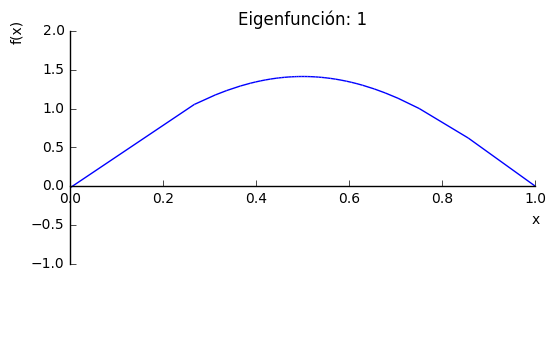

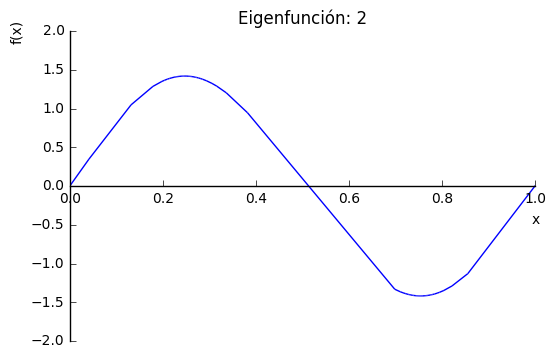

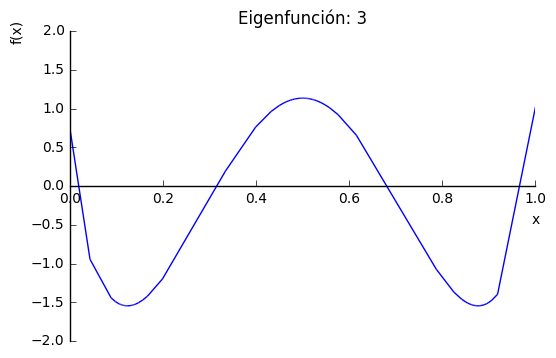

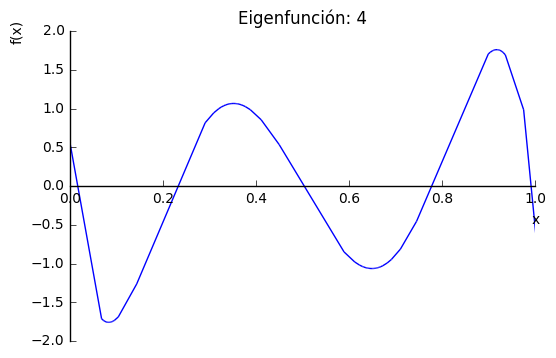

In [10]:
# Normalizar las funciones de onda
f=(np.reshape(f,(n)))
ef=csol*f
for i in range(n):
    integrando=ef[i]*ef[i]
    integ=Integral(integrando,(x,0,l))
    integ=integ.doit()
    cts[i]=solve(integ-1,Cdet[i])
    if abs(cts[i][0])==cts[0][0]:
        CTS[i]=cts[i][0]
    else:
        CTS[i]=cts[i][1]
    ef=ef.subs({Cdet[i]:CTS[i]})

for i in range(n):
    plot(ef[i].subs({l:1}),xlim=(0,1),ylim=(-2,2),title='Eigenfunción: %d' %(i+1))
    
# Función de onda total
#phi=0
#for i in range(n):
    #phi=phi+ef[0]
#plot(phi.subs({l:1}),xlim=(0,1),ylim=(0,8), title='Función de onda')

# Falta automatizar los limites de las funciones tanto cuando se piden como ahorita

In [11]:
# Aún no esta listo esta parte
# Error respecto a la funcion original
#Fx1_original=sin(2*pi*x/l)
#Error=((ef[0]-Fx1_original)/Fx1_original)*100
#plot(ef[i].subs({l:1}),xlim=(0,1),ylim=(-2,2),title='Error en el primer estado')